<a href="https://colab.research.google.com/github/Ohribird/Durk/blob/main/Talib%20%EC%9D%B4%EC%9A%A9%ED%95%9C%20%EC%9D%B4%EB%8F%99%ED%8F%89%EA%B7%A0%EC%84%A0%20%26%20RSI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

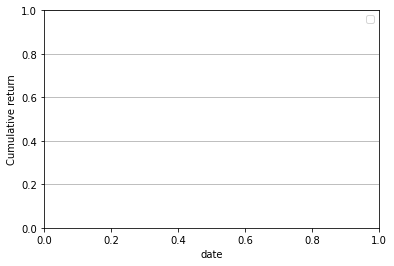

In [19]:
# !wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
# !tar -xzvf ta-lib-0.4.0-src.tar.gz
# %cd ta-lib
# !./configure --prefix=/usr
# !make
# !make install
# !pip install Ta-Lib
# !pip install finance-datareader
import FinanceDataReader as fdr
import numpy as np

df = fdr.DataReader(symbol = 'TQQQ')
df= df.tail(1000)

import talib
import matplotlib.pyplot as plt

df['SMA_20'] = talib.SMA(df['Close'], timeperiod = 20)  #20일 단순 이동평균
df['SMA_120'] = talib.SMA(df['Close'], timeperiod = 120)  

plt.xlabel('date')
plt.ylabel('Cumulative return')
plt.grid(True, axis = 'y')
plt.legend()  

# df[['Close', 'SMA_20', 'SMA_60']].plot(figsize = (10,6))
# plt.show()

# #지수이동평균 계산

# df['EMA_60'] = talib.EMA(df['Close'], 60) 
# df[['Close', 'SMA_60', 'EMA_60']].plot(figsize = (10,6))
# plt.show()


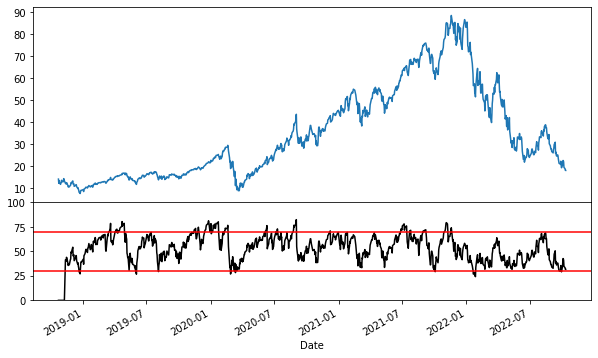

In [24]:
#RSI 

from matplotlib import gridspec 

df['RSI14'] = talib.RSI(df['Close'], timeperiod = 14)
df['RSI14'].fillna(0, inplace =True)
fig = plt.subplots(figsize = (10,6), sharex = True)
gs = gridspec.GridSpec(nrows = 2, ncols = 1, height_ratios = [2,1])

#주가나타내기

ax1 = plt.subplot(gs[0])
ax1 = df['Close'].plot()
ax1.set_xlabel("")
ax1.axes.xaxis.set_ticks([])


#RSI 나타내기

ax2 = plt.subplot(gs[1])
ax2 = df['RSI14'].plot(color = 'k', ylim = [0,100])
ax2.axhline(y= 70, color='r', linestyle = '-')
ax2.axhline(y= 30, color='r', linestyle = '-')
ax2.set_xlabel

plt.subplots_adjust(wspace = 0, hspace = 0)
plt.show()